<a href="https://colab.research.google.com/github/diego6289/CAP4630/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

###Import packages

In [0]:
## importing the necessary packages

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

###Get random data

In [0]:
# creating the random data function
def get_random_data(w, b, mu, sigma, m):

# c will be used as class label with value 0 and 1 with equal probability
# m = number of data points
  c = np.random.randint(2, size = m)
  n = np.random.normal(mu, sigma, m)
  x_1 = np.random.rand(m) # first feature randomly generated
  x_2 = w * x_1 + b + (-1)**c * n  # second feature
  features = np.column_stack([x_1, x_2])
  # returns the entire data frame
  return (features, c)

In [88]:
m = 6000 # number of data points

# running the function to create variables and label data
data, labels = get_random_data(5, 5, 1, 1, m)

print("The shape of the the feature space or the variables is: ", data.shape)
print("The shape of the labels column is: ",labels.shape)

The shape of the the feature space or the variables is:  (6000, 2)
The shape of the labels column is:  (6000,)


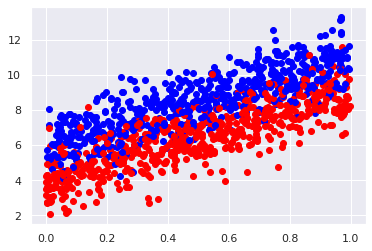

In [89]:
# function to display the generated data
def display_random_data(labels, data, show_graph_boolean):
  display_percentage = (int)(m * 0.2)
  labels_percentage = labels[:display_percentage]
  data_percentage = data[:display_percentage]

  for color_code, datapoint in zip(labels_percentage, data_percentage):
    plt.scatter(datapoint[0], datapoint[1], color = ('red' if color_code == 1 else 'blue'))
  
  if show_graph_boolean:
    plt.show()

display_random_data(labels, data, 1)

###Display random data

In [0]:
# dividing data into trian and testing with 80/20 rule
split = int(m * .80)
training_set = data[:split]
testing_set = data[split:]

training_set_label = labels[:split]
testing_set_label = labels[split:]

# Problem 2

###Train the model

In [0]:
# importing tensorflow package 
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
def keras_model():
  glm_model = tf.keras.models.Sequential()

  # adding layers and activation function
  glm_model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape = (2, )))

  glm_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
  return glm_model

In [93]:
# setting the number of epochs
epochs_count = 300

my_keras_model = keras_model()

history_of_model = my_keras_model.fit(training_set, training_set_label, epochs = epochs_count, batch_size = 512, validation_data = (testing_set, testing_set_label))

Epoch 1/300
10/10 [==============================] - 0s 12ms/step - loss: 1.2166 - accuracy: 0.4960 - val_loss: 1.2268 - val_accuracy: 0.4742
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: 1.1679 - accuracy: 0.4960 - val_loss: 1.1904 - val_accuracy: 0.4742
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 1.1480 - accuracy: 0.4960 - val_loss: 1.1570 - val_accuracy: 0.4742
Epoch 4/300
10/10 [==============================] - 0s 5ms/step - loss: 1.1086 - accuracy: 0.4960 - val_loss: 1.1256 - val_accuracy: 0.4742
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 1.0757 - accuracy: 0.4960 - val_loss: 1.0954 - val_accuracy: 0.4742
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 1.0460 - accuracy: 0.4960 - val_loss: 1.0657 - val_accuracy: 0.4742
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 1.0197 - accuracy: 0.4960 - val_loss: 1.0369 - val_accuracy: 0.4742
Epoch 8/300


###Plot with separating line

Text(0, 0.5, 'Y values')

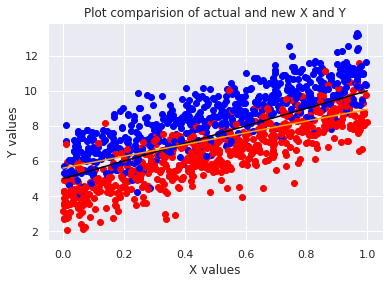

In [94]:
actual_x_val = np.linspace(0.0, 1.0, 100)
actual_y_val = actual_x_val * 5 + 5

# plotting actual x and actual y value
plt.plot(actual_x_val, actual_y_val, color = 'black')

# creating new x value and y value
x_new_val = np.linspace(0.0, 1.0, 100)
weights_values = my_keras_model.layers[0].get_weights()

bias_value = weights_values[1][0]
x_1_weight = weights_values[0][0]
x_2_weight = weights_values[0][1]

# the inputs and weights of vectors in 2-dimensions, the dot product summation is: w1 * x1 + w2 + x2 + b
# since x1 is x and x2 is y, it can be rewritten as w1x + w2y + b... the standard equation of a line (Ax + By - C = 0)
# subtract c from both sides and solve the equation for x and y. With those 2 points we can acquire the slope
# rearrange the equation in slope intercept form and plug in values. 
# Source: https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38

y_new_val = (-(bias_value / x_2_weight) / (bias_value / x_1_weight)) * x_new_val + (-bias_value / x_2_weight)

## plotting new x and y value
plt.plot(x_new_val, y_new_val, color = 'orange')
display_random_data(labels, data, 0)
plt.plot()

# Add title and axis names
plt.title('Plot comparision of actual and new X and Y')
plt.xlabel('X values')
plt.ylabel('Y values')


###Display heat map

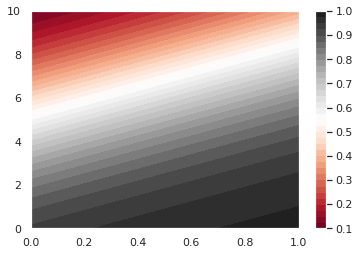

In [95]:
x_lin = np.linspace(0, 1, 500)
y_lin = np.linspace(0, 10, 500)

fig = plt.figure()

X, Y = np.meshgrid(x_lin, y_lin)

z = my_keras_model.predict(np.c_[X.ravel(), Y.ravel()])

z = z.reshape(X.shape)

plt.xlim([0, 1])
plt.ylim([0, 10])

plt.contourf(X, Y, z, 40, cmap = 'RdGy')
plt.colorbar()
plt.show()

# Problem 3

###Compute loss and binary cross entropy

In [0]:
epochs_count = 300
lr = 0.001

In [0]:
def sigmoid_function(z):
  return 1 / (1 + np.exp(-1 * z))

def entropy_func(y, a):
  return -y * np.log10(a) - (1 - y) * np.log10(1 - a)

def loss_computation(A, B):
  partial = m*.80
  loss_val = 0
  for data_val, label in zip(A, B):
    predictor = np.dot(np.reshape(weights_manually_calculated, (2, )), data_val) + bias_term
    bce = entropy_func(label, sigmoid_function(predictor))
    loss_val += bce
  loss_val /= (partial)
  return loss_val

In [98]:
# Stochastic gradient descent
weights_manually_calculated = np.random.rand(2)
bias_term = np.zeros(1)

for epoch in np.arange(epochs_count):
  for i in np.arange(80):
    y_pred = np.dot(weights_manually_calculated, training_set[i]) + bias_term
    inner = sigmoid_function(y_pred) - training_set_label[i]
    gradient_weight_0 = inner * training_set[i][0]
    gradient_weight_1 = inner * training_set[i][1]
    gradient_b = inner

    weights_manually_calculated[0] -= lr * gradient_weight_0
    weights_manually_calculated[1] -= lr * gradient_weight_1
    bias_term -= lr * gradient_b

print("The manual weight is : ",weights_manually_calculated)
print("The manual bias term is: ", bias_term)


The manual weight is :  [ 0.60707405 -0.2781969 ]
The manual bias term is:  [1.50976419]


In [99]:
## Compute accuracy
accuracy = 0
partial = m*.80
for data_val, label in zip(testing_set,testing_set_label):
  y_prediction = np.dot(np.reshape(weights_manually_calculated, (2, )), data_val) + bias_term
  label_prediction = 1 if sigmoid_function(y_prediction) > 0.5 else 0
  accuracy += 1 if label_prediction == label else 0

print(accuracy / (m - partial))

0.7091666666666666


###Grid plot

Text(0, 0.5, 'Y values')

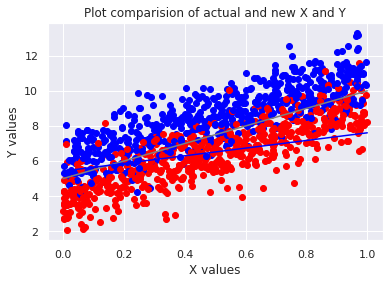

In [100]:
x_actual = np.linspace(0.0, 1.0, 100)
y_actual = x_actual * 5 + 5

plt.plot(x_actual, y_actual, color = 'grey')

x_new = np.linspace(0.0, 1.0, 100)

bias = bias_term[0]
x_1_weight = weights_manually_calculated[0]
x_2_weight = weights_manually_calculated[1]

y_new = (-(bias / x_2_weight) / (bias / x_1_weight)) * x_new + (-bias / x_2_weight)

plt.plot(x_new, y_new, color = 'blue')
display_random_data(labels, data, 0)
plt.plot()

plt.title('Plot comparision of actual and new X and Y')
plt.xlabel('X values')
plt.ylabel('Y values')

###Heat map

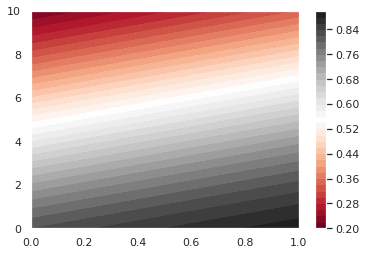

In [101]:
x_linear = np.linspace(0, 1, 500)
y_linear = np.linspace(0, 10, 500)

figure = plt.figure()

X, Y = np.meshgrid(x_linear, y_linear)

z_value = sigmoid_function(X.ravel() * weights_manually_calculated[0] + Y.ravel() * weights_manually_calculated[1] + bias_term[0])
z_value = z_value.reshape(X.shape)

# plotting the gradient
plt.xlim([0, 1]) # limit for x axis
plt.ylim([0, 10]) # limit for y axis

plt.contourf(X, Y, z_value, 40, cmap = 'RdGy')
plt.colorbar()
plt.show()